<a href="https://colab.research.google.com/github/swapnilbarde/SpaceX-Casestudy/blob/main/SpaceX_landing_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SpaceX  Falcon 9 first stage Landing Prediction**

In this capstone, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. In this lab, you will collect and make sure the data is in the correct format from an API. The following is an example of a successful and launch.

Prepared by- 
*  [Swapnil Barde](https://www.linkedin.com/in/swapnilbarde/)


## 1. Data collection




### Data collection through SpaceX API

In this session, we will make a get request to the SpaceX API.

Objectives :
* Task1 : Request to the SpaceX API
* Task2 : Clean the requested data




In [1]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

Now let's start requesting rocket launch data from SpaceX API with the following URL:

In [2]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [3]:
response = requests.get(spacex_url)
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png","large":"https://images2.imgbox.com/40/e3/GypSkayF_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

#### Task 1: Request and parse the SpaceX launch data using the GET request

To make the requested JSON results more consistent, we will use the following static response object for this project:

In [4]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

We should see that the request was successfull with the 200 status response code


In [5]:
response.status_code

200

Now we decode the response content as a Json using <code>.json()</code> and turn it into a Pandas dataframe using <code>.json_normalize()</code>

In [6]:
# Use json_normalize meethod to convert the json result into a dataframe
data = pd.json_normalize(response.json())
data.head(5)

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/3d/86/cnu0pan8_o.png,https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

You will notice that a lot of the data are IDs. For example the rocket column has no information about the rocket just an identification number.

We will now use the API again to get information about the launches using the IDs given for each launch. Specifically we will be using columns <code>rocket</code>, <code>payloads</code>, <code>launchpad</code>, and <code>cores</code>.

In [7]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

*   From the <code>rocket</code> we would like to learn the booster name

*   From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to

*   From the <code>launchpad</code> we would like to know the name of the launch site being used, the longitude, and the latitude.

*   From <code>cores</code> we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

The data from these requests will be stored in lists and will be used to create a new dataframe.

In [8]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

From the <code>rocket</code> column we would like to learn the booster name.


In [9]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

From the <code>launchpad</code> we would like to know the name of the launch site being used, the logitude, and the latitude.


In [10]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])

From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to.


In [11]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

From <code>cores</code> we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, wheter the core is reused, wheter legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

In [12]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

Now, let's apply <code> getBoosterVersion</code> function method to get the booster version

In [13]:
# Call getBoosterVersion
getBoosterVersion(data)

# Call getLaunchSite
getLaunchSite(data)

# Call getPayloadData
getPayloadData(data)

# Call getCoreData
getCoreData(data)

Finally lets construct our dataset using the data we have obtained. We we combine the columns into a dictionary.

In [14]:
launch_dict = {
'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

In [15]:
# Create a data from launch_dict
data2 = pd.DataFrame(launch_dict)
data2.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


#### Task 2 : Filter the Dataframe to only `Falcon 9` Launches

Finally we will remove the Falcon 1 launches keeping only the Falcon 9 launches. Filter the data dataframe using the <code>BoosterVersion</code> column to only keep the Falcon 9 launches. Save the filtered data to a new dataframe called <code>data_falcon9</code>.


In [16]:
# Creating new dataframe with only Falcon 9 Launches
data_falcon9 = data2[data2['BoosterVersion']=='Falcon 9']
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,7,B1060,-80.603956,28.608058
90,103,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,7,B1058,-80.603956,28.608058
91,104,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,9,B1051,-80.603956,28.608058
92,105,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,7,B1060,-80.577366,28.561857


In [17]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9.reset_index(drop=True)
data_falcon9

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,7,B1060,-80.603956,28.608058
90,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,7,B1058,-80.603956,28.608058
91,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,9,B1051,-80.603956,28.608058
92,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,7,B1060,-80.577366,28.561857


#### Task3 : Dealing with Missing values

we can see below that some of the rows are missing values in our dataset

In [18]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

Before we can continue we must deal with these missing values. The <code>LandingPad</code> column will retain None values to represent when landing pads were not used.

Replacing the null vlaues of `PayloadMass` with mean values 

In [19]:
# Calculate the mean value of PayloadMass column
pm_mean = data_falcon9['PayloadMass'].mean()
# Replace the np.nan values with its mean value
temp = data_falcon9['PayloadMass'].replace(np.nan, pm_mean)
data_falcon9['PayloadMass'] = temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Data Wrangling

In this lab, we will perform some Exploratory Data Analysis (EDA) to find some patterns in the data and determine what would be the label for training supervised models.

Objectives:
*   Exploratory Data Analysis
*   Determine Training Labels

In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; for example, 
* <code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean
* <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean.
* <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad
* <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.
* <code>True ASDS</code> means the mission outcome was successfully landed on  a drone ship
* <code>False ASDS</code> means the mission outcome was unsuccessfully landed on a drone ship.

In this lab we will mainly convert those outcomes into Training Labels with `1` means the booster successfully landed `0` means it was unsuccessful.

Falcon 9 first stage will land successfully

![](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/d901517ee7d978a71bedfbb41170dd96074d2db0/Photos/landing_1.gif?raw=true)

Several examples of an unsuccessful landing are shown here:

![](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/d901517ee7d978a71bedfbb41170dd96074d2db0/Photos/crash.gif?raw=true)

#### Exploratory Data Analysis

In [20]:
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


Identify and calculate the percentage of the missing values in each attribute

In [21]:
data_falcon9.isnull().sum()/data_falcon9.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

In [22]:
data_falcon9.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

##### Task 1 : Calculate the number of launches on each site

The data contains several Space X  launch facilities: <a href='https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01'>Cape Canaveral Space</a> Launch Complex 40  <b>VAFB SLC 4E </b> , Vandenberg Air Force Base Space Launch Complex 4E <b>(SLC-4E)</b>, Kennedy Space Center Launch Complex 39A <b>KSC LC 39A </b>.The location of each Launch Is placed in the column <code>LaunchSite</code>

Next, let's see the number of launches for each site.

In [23]:
# Apply value_counts() on column LaunchSite
data_falcon9.LaunchSite.value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

*   <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),\[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.\[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01'>\[1]</a>.

*   <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01'>\[2]</a>.

*   <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01" >\[3] </a>.

*   <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">\[4] <a>.

*   <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01#L1_point">\[5]</a> .

*   <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">\[6]</a>.

*   <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[7] </a>

*   <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[8] </a>

*   <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[9] </a>

*   <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[10] </a>

*   <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[11] </a>

some are shown in the following plot:

![](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/master/Photos/Orbits.png?raw=true)

##### Task 2: Calculate the number of occurrence of each orbit

In [24]:
# Apply value_counts on Orbit column
data_falcon9.Orbit.value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
SO        1
HEO       1
ES-L1     1
GEO       1
Name: Orbit, dtype: int64

##### Task 3: Calculate the number and occurence of mission outcome per orbit type

In [25]:
# landing_outcomes = values on Outcome column
landing_outcomes = data_falcon9.Outcome.value_counts()

In [26]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


We create a set of outcomes where the second stage did not land successfully:

In [27]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

##### Task 4: Create a landing outcome label from outcome column

In [28]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise

def outcome(item):
    if item in bad_outcomes:
        return 0
    else:
        return 1
landing_class = data_falcon9["Outcome"].apply(outcome)

This variable will represent the classification variable that represents the outcome of each launch. If the value is zero, the first stage did not land successfully; one means the first stage landed Successfully

In [29]:
data_falcon9['Class']=landing_class
data_falcon9[['Class']].head(8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Class
4,0
5,0
6,0
7,0
8,0
9,0
10,1
11,1


In [30]:
data_falcon9['Class'].value_counts()

1    60
0    30
Name: Class, dtype: int64

In [31]:
data_falcon9["Class"].mean()

0.6666666666666666

In [32]:
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,0
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,0
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,0
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,0


### Data Collection through Webscraping
Web scraping Falcon 9 and Falcon Heavy Launches Records from Wikipedia

[https://en.wikipedia.org/wiki/List_of_Falcon\_9\_and_Falcon_Heavy_launches](https://en.wikipedia.org/wiki/List_of_Falcon\_9\_and_Falcon_Heavy_launches?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01)
[link text](https://)

Objectives:


*   Task 1: Extract a Falcon 9 launch records HTML table from Wikipedia
*   Task 2: Parse the table and convert it into a Pandas data frame
*   Task 3: Create a dataframe by parsing the launch HTML tables

In [33]:
# installing required packages
!pip3 install beautifulsoup4
!pip3 install requests

In [34]:
# importing necessary libraries
from bs4 import BeautifulSoup
import re
import unicodedata

Following commands can be used to process web scraped HTML table

In [35]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name 


To keep the lab tasks consistent, you will be asked to scrape the data from a snapshot of the  `List of Falcon 9 and Falcon Heavy launches` Wikipage updated on
`9th June 2021`

In [36]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

#### Task 1 : Request the falcon9 launch Wiki page from its URL

First, let's perform an HTTP GET method to request the Falcon9 Launch HTML page, as an HTTP response.

In [37]:
# use requests.get() method with the provided static_url
# assign the response to a object
response = requests.get(static_url)

Create a `BeautifulSoup` object from the HTML `response`

In [38]:
# Use BeautifulSoup() to create a BeautifulSoup object from a response text content
soup = BeautifulSoup(response.text, 'html.parser')

Print the page title to verify if the `BeautifulSoup` object was created properly

In [39]:
# Use soup.title attribute
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

#### Task 2 : Extract all column/variable names from HTML table header

Next, we want to collect all relevant column names from the HTML table header


In [40]:
# Use the find_all function in the BeautifulSoup object, with element type `table`
# Assign the result to a list called `html_tables`
html_tables = soup.find_all('table')

Starting from the third table is our target table contains the actual launch records.

In [41]:
# Let's print the third table and check its content
first_launch_table = html_tables[2]
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11">[b]</a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12">[c]</a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 9 first-stage landing tests">Booster<br/>landing</a>
</th></tr>
<tr>
<th rowspan="2" scope="row" style="text-align:center;">1
</th>
<td>

You should able to see the columns names embedded in the table header elements `<th>`

Next, we just need to iterate through the `<th>` elements and apply the provided `extract_column_from_header()` to extract column name one by one

In [42]:
column_names = []

# Apply find_all() function with `th` element on first_launch_table
# Iterate each th element and apply the provided extract_column_from_header() to get a column name
# Append the Non-empty column name (`if name is not None and len(name) > 0`) into a list called column_names
for i in first_launch_table.find_all('th'):
    if extract_column_from_header(i)!=None:
        if len(extract_column_from_header(i))>0:
            column_names.append(extract_column_from_header(i))


These are the extracted column names

In [43]:
print(column_names)

['Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome']


#### Task 3 : Create a dataframe by parsing the launch HTML tables

We will create an empty dictionary with keys from the extracted column names in the previous task. Later, this dictionary will be converted into a Pandas dataframe

In [44]:
launch_dict2= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict2['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict2['Flight No.'] = []
launch_dict2['Launch site'] = []
launch_dict2['Payload'] = []
launch_dict2['Payload mass'] = []
launch_dict2['Orbit'] = []
launch_dict2['Customer'] = []
launch_dict2['Launch outcome'] = []
# Added some new columns
launch_dict2['Version Booster']=[]
launch_dict2['Booster landing']=[]
launch_dict2['Date']=[]
launch_dict2['Time']=[]

Next, we just need to fill up the `launch_dict2` with launch records extracted from table rows.


Usually, HTML tables in Wiki pages are likely to contain unexpected annotations and other types of noises, such as reference links `B0004.1[8]`, missing values `N/A [e]`, inconsistent formatting, etc.


To simplify the parsing process, we have provided an incomplete code snippet below to help you to fill up the `launch_dict2`. Please complete the following code snippet with TODOs or you can choose to write your own logic to parse all launch tables:

In [45]:
extracted_row = 0
#Extract each table 
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row 
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number 
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element 
        row=rows.find_all('td')
        #if it is number save cells in a dictonary 
        if flag:
            extracted_row += 1
            
            # Flight Number value
            launch_dict2['Flight No.'].append(flight_number) # Append the flight_number into launch_dict with key `Flight No.`
            print(flight_number)
            datatimelist=date_time(row[0])
            
            # Date value
            date = datatimelist[0].strip(',') 
            launch_dict2['Date'].append(date) # Append the date into launch_dict with key `Date`
            print(date)
            
            # Time value 
            time = datatimelist[1]
            launch_dict2['Time'].append(time) # Append the time into launch_dict with key `Time`
            print(time)
              
            # Booster version
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            launch_dict2['Version Booster'].append(bv)  # Append the bv into launch_dict with key `Version Booster`
            print(bv)
            
            # Launch Site
            launch_site = row[2].a.string
            launch_dict2['Launch site'].append(launch_site) # Append the bv into launch_dict with key `Launch Site`
            print(launch_site)
            
            # Payload
            
            payload = row[3].a.string
            launch_dict2['Payload'].append(payload) # Append the payload into launch_dict with key `Payload`
            print(payload)
            
            # Payload Mass
            payload_mass = get_mass(row[4])
            launch_dict2['Payload mass'].append(payload) # Append the payload_mass into launch_dict with key `Payload mass`
            print(payload)
            
            # Orbit
            orbit = row[5].a.string
            launch_dict2['Orbit'].append(orbit) # Append the orbit into launch_dict with key `Orbit`
            print(orbit)
            
            # Customer
            if row[6].a!=None:
                customer = row[6].a.string
            else: 
                customer='None'
            launch_dict2['Customer'].append(customer) # Append the customer into launch_dict with key `Customer`
            print(customer)
            
            # Launch outcome
            launch_outcome = list(row[7].strings)[0]
            launch_dict2['Launch outcome'].append(launch_outcome) # Append the launch_outcome into launch_dict with key `Launch outcome`
            print(launch_outcome)
            
            # Booster landing
            
            booster_landing = landing_status(row[8])
            launch_dict2['Booster landing'].append(booster_landing) # Append the launch_outcome into launch_dict with key `Booster landing`
            print(booster_landing)
            
            print('*'*15)

1
4 June 2010
18:45
F9 v1.0B0003.1
CCAFS
Dragon Spacecraft Qualification Unit
Dragon Spacecraft Qualification Unit
LEO
SpaceX
Success

Failure
***************
2
8 December 2010
15:43
F9 v1.0B0004.1
CCAFS
Dragon
Dragon
LEO
NASA
Success
Failure
***************
3
22 May 2012
07:44
F9 v1.0B0005.1
CCAFS
Dragon
Dragon
LEO
NASA
Success
No attempt

***************
4
8 October 2012
00:35
F9 v1.0B0006.1
CCAFS
SpaceX CRS-1
SpaceX CRS-1
LEO
NASA
Success

No attempt
***************
5
1 March 2013
15:10
F9 v1.0B0007.1
CCAFS
SpaceX CRS-2
SpaceX CRS-2
LEO
NASA
Success

No attempt

***************
6
29 September 2013
16:00
F9 v1.1B1003
VAFB
CASSIOPE
CASSIOPE
Polar orbit
MDA
Success
Uncontrolled
***************
7
3 December 2013
22:41
F9 v1.1
CCAFS
SES-8
SES-8
GTO
SES
Success
No attempt
***************
8
6 January 2014
22:06
F9 v1.1
CCAFS
Thaicom 6
Thaicom 6
GTO
Thaicom
Success
No attempt
***************
9
18 April 2014
19:25
F9 v1.1
Cape Canaveral
SpaceX CRS-3
SpaceX CRS-3
LEO
NASA
Success

Controlled


After you have fill in the parsed launch record values into `launch_dict2`, you can create a dataframe from it.

In [46]:
spacextbl=pd.DataFrame(launch_dict2)
spacextbl

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,CCAFS,Dragon Spacecraft Qualification Unit,Dragon Spacecraft Qualification Unit,LEO,SpaceX,Success\n,F9 v1.0B0003.1,Failure,4 June 2010,18:45
1,2,CCAFS,Dragon,Dragon,LEO,NASA,Success,F9 v1.0B0004.1,Failure,8 December 2010,15:43
2,3,CCAFS,Dragon,Dragon,LEO,NASA,Success,F9 v1.0B0005.1,No attempt\n,22 May 2012,07:44
3,4,CCAFS,SpaceX CRS-1,SpaceX CRS-1,LEO,NASA,Success\n,F9 v1.0B0006.1,No attempt,8 October 2012,00:35
4,5,CCAFS,SpaceX CRS-2,SpaceX CRS-2,LEO,NASA,Success\n,F9 v1.0B0007.1,No attempt\n,1 March 2013,15:10
...,...,...,...,...,...,...,...,...,...,...,...
116,117,CCSFS,Starlink,Starlink,LEO,SpaceX,Success\n,F9 B5B1051.10,Success,9 May 2021,06:42
117,118,KSC,Starlink,Starlink,LEO,SpaceX,Success\n,F9 B5B1058.8,Success,15 May 2021,22:56
118,119,CCSFS,Starlink,Starlink,LEO,SpaceX,Success\n,F9 B5B1063.2,Success,26 May 2021,18:59
119,120,KSC,SpaceX CRS-22,SpaceX CRS-22,LEO,NASA,Success\n,F9 B5B1067.1,Success,3 June 2021,17:29


## 2. Exploratory Data Analysis

EDA with SQL on webscrapped data

[Click here to visit EDA analysis done on IBM Watson](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/422237172f10a3d28eaa8b655f3a0f410c337c0e/EDA-with-SQL.ipynb)

![](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/main/Photos/Distinct(landin_outcome).png?raw=true)

![](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/main/Photos/Distinct(launch_site).png?raw=true)

![](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/main/Photos/Launchsites.png?raw=true)

![](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/main/Photos/payload_mass(sum).png?raw=true)

![](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/main/Photos/avg(payload_mass).png?raw=true)

![](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/main/Photos/First_success.png?raw=true)

![](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/main/Photos/sucess_droneship.png?raw=true)

![](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/main/Photos/outcome-counts.png?raw=true)

![](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/main/Photos/Boosterversion_for_maxpayload.png?raw=true)

![](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/main/Photos/failed_outcome.png?raw=true)

![](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/main/Photos/landing_outcome_count.png?raw=true)

## 3. Data Prepartion And Visualization


Objectives

* Preparing Data Feature Engineering

In [47]:
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
%matplotlib inline
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [48]:
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,0
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,0
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,0
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

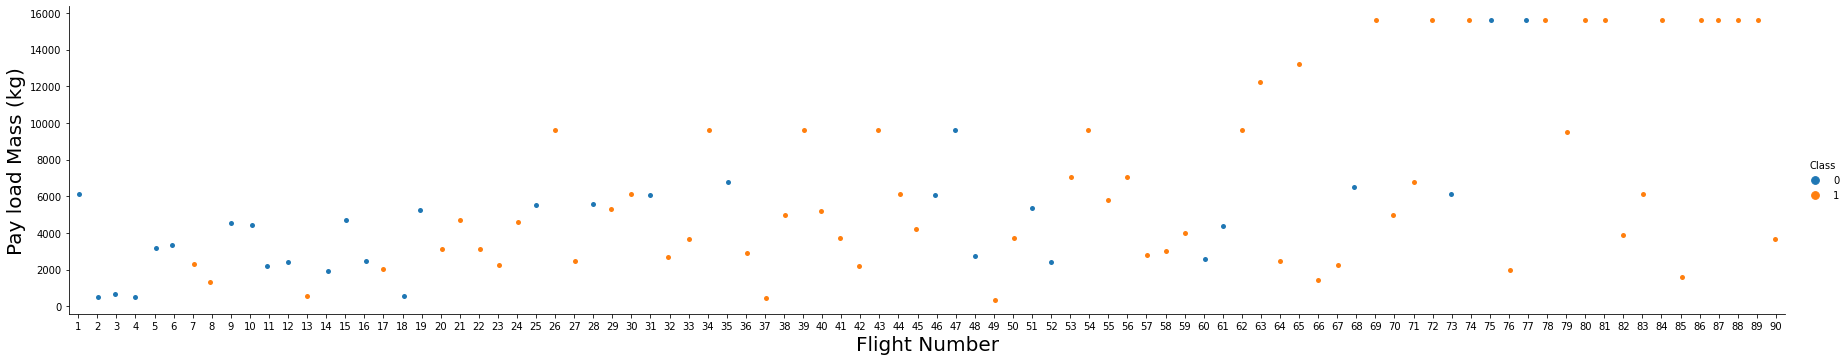

In [49]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=data_falcon9, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()


We see that different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%.

Next, let's drill down to each site visualize its detailed launch records.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


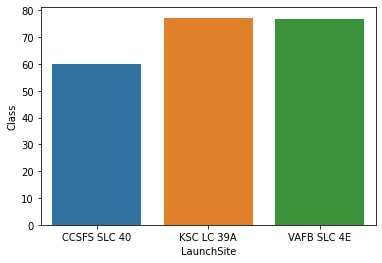

In [50]:
temp10 = data_falcon9.groupby(["LaunchSite"]).mean().reset_index()
temp20 = temp10[["LaunchSite", "Class"]]
temp20["Class"] = temp20["Class"]*100
sns.barplot(x = "LaunchSite", y = "Class", data = temp20)

#### Task 1: Visualize the relationship between FlightNumber and Launch Site


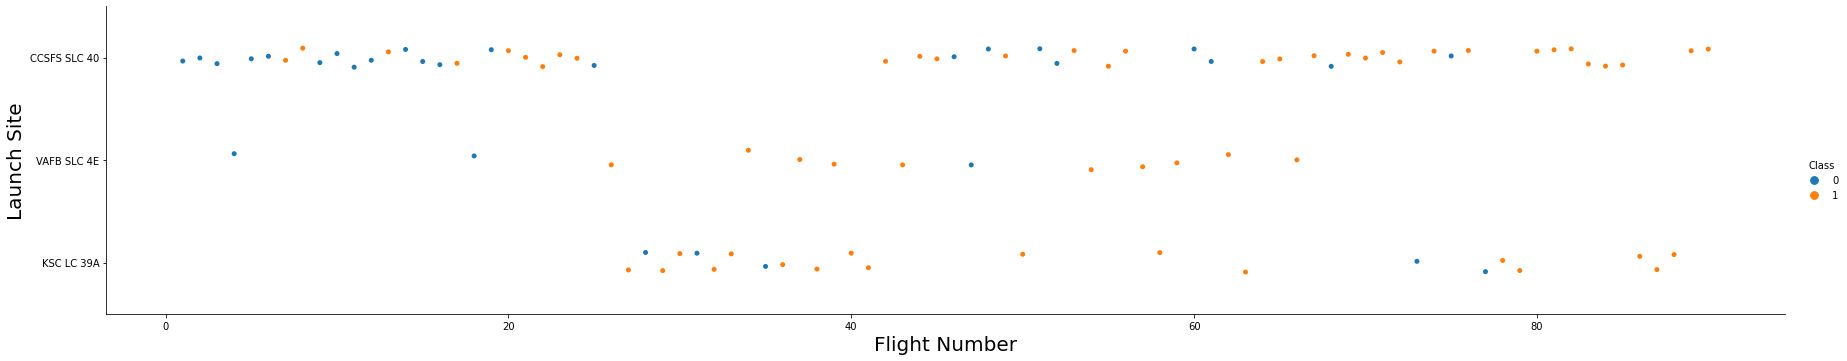

In [51]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=data_falcon9, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

#### Task 2: Visualize the relationship between Payload and Launch Site

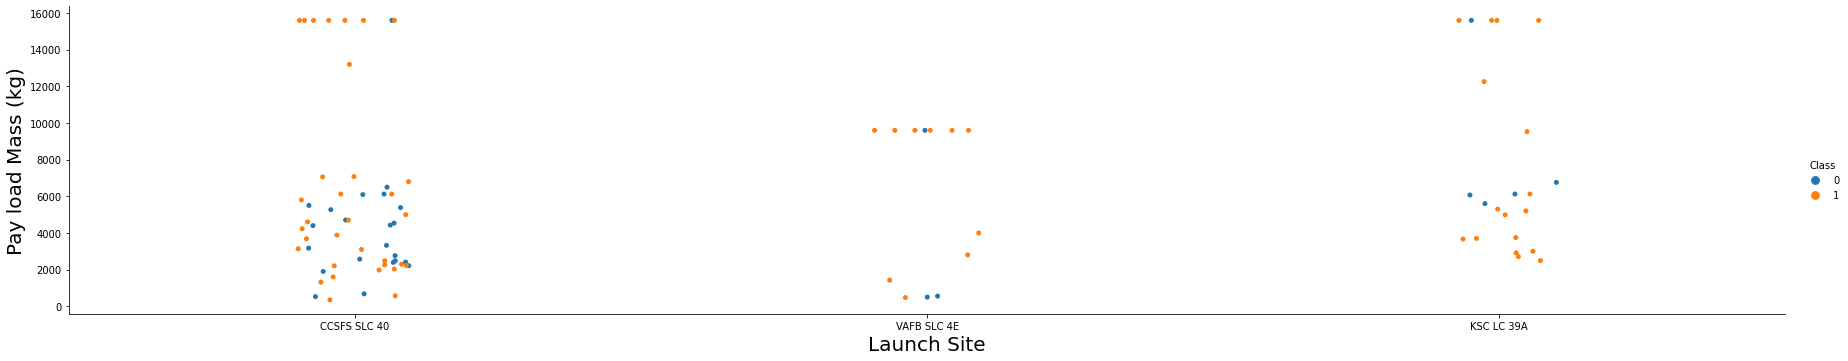

In [52]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=data_falcon9, aspect = 5)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

#### TASK 3: Visualize the relationship between success rate of each orbit type

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


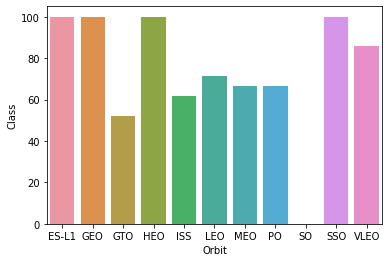

In [53]:
temp = data_falcon9.groupby(["Orbit"]).mean().reset_index()
temp2 = temp[["Orbit", "Class"]]
temp2["Class"] = temp2["Class"]*100
sns.barplot(x = "Orbit", y = "Class", data = temp2)

#### TASK 4: Visualize the relationship between FlightNumber and Orbit type

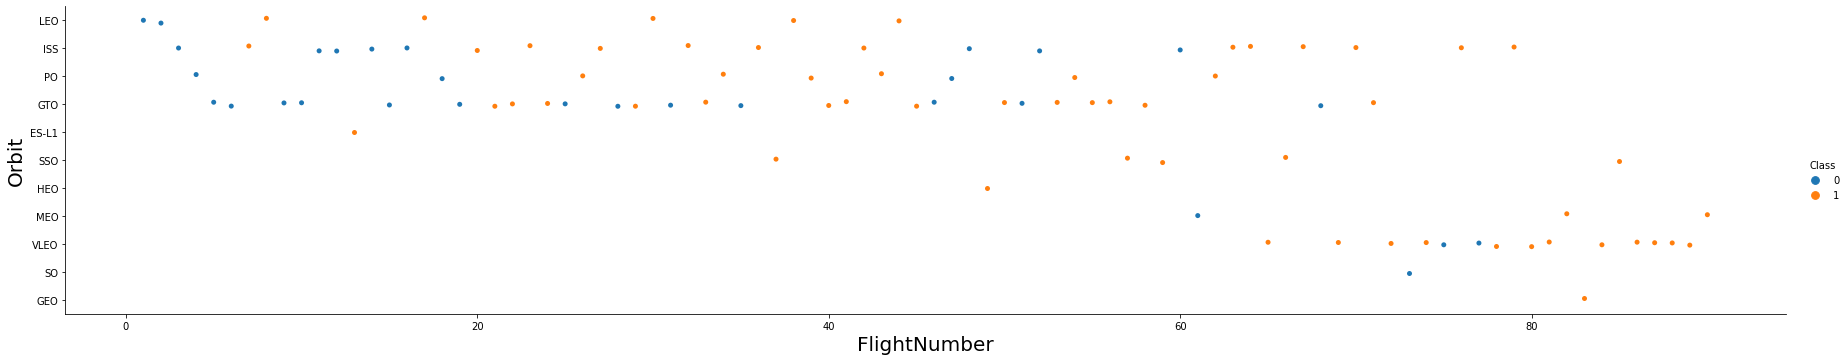

In [54]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=data_falcon9, aspect = 5)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

#### TASK 5: Visualize the relationship between Payload and Orbit type

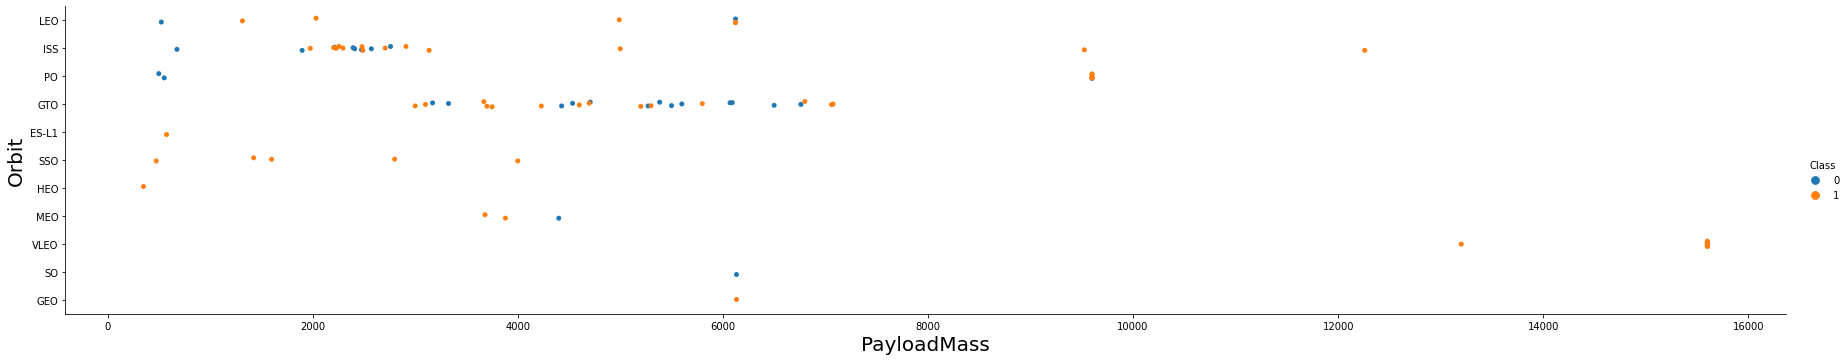

In [55]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=data_falcon9, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

#### TASK 6: Visualize the launch success yearly trend

In [56]:
# Converting to datetime for easy numpy manupulation
data_falcon9['Date'] = pd.to_datetime(data_falcon9['Date'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
# Adding year column in the dataset
data_falcon9['year']=pd.to_datetime(data_falcon9['Date']).dt.strftime('%Y') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


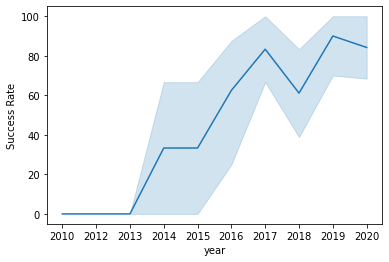

In [58]:
#  Plot a line chart with x axis to be the extracted year and y axis to be the success rate
data_falcon9["Success Rate"] = data_falcon9["Class"] * 100
sns.lineplot(data = data_falcon9, x = "year", y = "Success Rate")

#### TASK 7: Feature Engineering

Create dummy variables to categorical columns

In [59]:
features = data_falcon9[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
4,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0003
5,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0005
6,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0007
7,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,None,1.0,0,B1003
8,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B1004


In [60]:
oh_orbit = pd.get_dummies(features["Orbit"])
oh_launch = pd.get_dummies(features["LaunchSite"])
oh_landing = pd.get_dummies(features["LandingPad"])
oh_serial = pd.get_dummies(features["Serial"])
remainder = features[["FlightNumber","PayloadMass", "Flights", "GridFins", "Reused", "Legs", "Block","ReusedCount"]]
features_one_hot = pd.concat([oh_launch, oh_landing, oh_serial, oh_orbit], axis=1)
features_one_hot.head()

,CCSFS SLC 40,KSC LC 39A,VAFB SLC 4E,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc,B0003,B0005,B0007,B1003,B1004,B1005,B1006,B1007,B1008,B1010,B1011,B1012,B1013,B1015,B1016,B1017,B1018,B1019,B1020,B1021,B1022,B1023,B1025,B1026,B1028,B1029,B1030,B1031,B1032,B1034,B1035,B1036,B1037,B1038,B1039,B1040,B1041,B1042,B1043,B1044,B1045,B1046,B1047,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,VLEO
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [61]:
features_one_hot.astype('float64')

,CCSFS SLC 40,KSC LC 39A,VAFB SLC 4E,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc,B0003,B0005,B0007,B1003,B1004,B1005,B1006,B1007,B1008,B1010,B1011,B1012,B1013,B1015,B1016,B1017,B1018,B1019,B1020,B1021,B1022,B1023,B1025,B1026,B1028,B1029,B1030,B1031,B1032,B1034,B1035,B1036,B1037,B1038,B1039,B1040,B1041,B1042,B1043,B1044,B1045,B1046,B1047,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,VLEO
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
91,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
92,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 4. Interactive Visual Analysis



### Launch Sites Locations Analysis with Folium

The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.

Objectives:

* TASK 1: Mark all launch sites on a map
* TASK 2: Mark the success/failed launches for each site on the map
* TASK 3: Calculate the distances between a launch site to its proximities

[You can visit this link for the Analysis made on IBM Watson](https://github.com/swapnilbarde/SpaceX-Casestudy/blob/4f4a002b0883dccb03966c88fe39532a3201ffde/Interactive%20Visual%20Analytics.ipynb)


## Machine Learning Prediction

Objectives:

* Perform exploratory Data Analysis and determine Training Labels
* create a column for the class
* Standardize the data
* Split into training data and test data
* Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
* Find the method performs best using test data

### Combining and preparing Data for Model


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In this lab, you will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.

In [62]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier


This function is to plot the confusion matrix.

In [63]:

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

Dataset 

In [64]:
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,year,Success Rate
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,0,2010,0
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,0,2012,0
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,0,2013,0
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0,2013,0
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,0,2013,0


In [65]:
features_one_hot.head()

,CCSFS SLC 40,KSC LC 39A,VAFB SLC 4E,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc,B0003,B0005,B0007,B1003,B1004,B1005,B1006,B1007,B1008,B1010,B1011,B1012,B1013,B1015,B1016,B1017,B1018,B1019,B1020,B1021,B1022,B1023,B1025,B1026,B1028,B1029,B1030,B1031,B1032,B1034,B1035,B1036,B1037,B1038,B1039,B1040,B1041,B1042,B1043,B1044,B1045,B1046,B1047,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,VLEO
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [66]:
df1 = features_one_hot.reset_index(drop=True)

In [67]:
df2 = data_falcon9.reset_index(drop=True)

In [68]:
df = pd.concat([df1, df2],axis=1)
df

,CCSFS SLC 40,KSC LC 39A,VAFB SLC 4E,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc,B0003,B0005,B0007,B1003,B1004,B1005,B1006,B1007,B1008,B1010,B1011,B1012,B1013,B1015,B1016,B1017,B1018,B1019,B1020,B1021,B1022,B1023,B1025,B1026,B1028,B1029,B1030,B1031,B1032,B1034,B1035,B1036,B1037,B1038,B1039,B1040,B1041,B1042,B1043,B1044,B1045,B1046,B1047,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,VLEO,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,year,Success Rate
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,0,2010,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,0,2012,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,0,2013,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0,2013,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,0,2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,86,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,7,B1060,-80.603956,28.608058,1,2020,100
86,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,87,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,7,B1058,-80.603956,28.608058,1,2020,100
87,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,88,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,9,B1051,-80.603956,28.608058,1,2020,100
88,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,89,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,7,B1060,-80.577366,28.561857,1,2020,100


In [69]:
df.drop(['Success Rate','year','Longitude','Latitude','Serial','LandingPad','LaunchSite','Date','BoosterVersion','Orbit','Flights','Outcome'],axis=1,inplace=True)

In [70]:
df.head()

,CCSFS SLC 40,KSC LC 39A,VAFB SLC 4E,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc,B0003,B0005,B0007,B1003,B1004,B1005,B1006,B1007,B1008,B1010,B1011,B1012,B1013,B1015,B1016,B1017,B1018,B1019,B1020,B1021,B1022,B1023,B1025,B1026,B1028,B1029,B1030,B1031,B1032,B1034,B1035,B1036,B1037,B1038,B1039,B1040,B1041,B1042,B1043,B1044,B1045,B1046,B1047,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,VLEO,FlightNumber,PayloadMass,GridFins,Reused,Legs,Block,ReusedCount,Class
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6123.547647,False,False,False,1.0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,525.000000,False,False,False,1.0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,677.000000,False,False,False,1.0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,500.000000,False,False,False,1.0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,3170.000000,False,False,False,1.0,0,0


#### Creating output variable Y

In [71]:
Y = df['Class'].to_numpy()

#### Standardize data in X

In [72]:
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(df)
x = pd.DataFrame(x_scaled)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,0.797724,-0.568796,-0.410891,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232,9.433981,-0.106000,-0.106000,-0.106000,-0.106000,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.150756,-0.106,-0.106,-0.106,-0.106,-0.106,-0.150756,-0.106,-0.150756,-0.150756,-0.106,-0.150756,-0.150756,-0.106,-0.106,-0.150756,-0.150756,-0.150756,-0.106,-0.106,-0.106,-0.150756,-0.215666,-0.185695,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000,-0.106,-0.106,-0.654654,-0.106,-0.551677,3.443420,-0.185695,-0.333333,-0.106,-0.242536,-0.429198,-1.712912,0.000000,-1.870829,-0.835532,-1.933091,-1.575895,-0.838580,-1.414214
1,0.797724,-0.568796,-0.410891,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232,-0.106000,9.433981,-0.106000,-0.106000,-0.106000,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.150756,-0.106,-0.106,-0.106,-0.106,-0.106,-0.150756,-0.106,-0.150756,-0.150756,-0.106,-0.150756,-0.150756,-0.106,-0.106,-0.150756,-0.150756,-0.150756,-0.106,-0.106,-0.106,-0.150756,-0.215666,-0.185695,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000,-0.106,-0.106,-0.654654,-0.106,-0.551677,3.443420,-0.185695,-0.333333,-0.106,-0.242536,-0.429198,-1.674419,-1.189724,-1.870829,-0.835532,-1.933091,-1.575895,-0.838580,-1.414214
2,0.797724,-0.568796,-0.410891,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232,-0.106000,-0.106000,9.433981,-0.106000,-0.106000,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.150756,-0.106,-0.106,-0.106,-0.106,-0.106,-0.150756,-0.106,-0.150756,-0.150756,-0.106,-0.150756,-0.150756,-0.106,-0.106,-0.150756,-0.150756,-0.150756,-0.106,-0.106,-0.106,-0.150756,-0.215666,-0.185695,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000,-0.106,-0.106,-0.654654,-0.106,1.812654,-0.290409,-0.185695,-0.333333,-0.106,-0.242536,-0.429198,-1.635927,-1.157423,-1.870829,-0.835532,-1.933091,-1.575895,-0.838580,-1.414214
3,-1.253566,-0.568796,2.433737,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232,-0.106000,-0.106000,-0.106000,9.433981,-0.106000,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.150756,-0.106,-0.106,-0.106,-0.106,-0.106,-0.150756,-0.106,-0.150756,-0.150756,-0.106,-0.150756,-0.150756,-0.106,-0.106,-0.150756,-0.150756,-0.150756,-0.106,-0.106,-0.106,-0.150756,-0.215666,-0.185695,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000,-0.106,-0.106,-0.654654,-0.106,-0.551677,-0.290409,-0.185695,3.000000,-0.106,-0.242536,-0.429198,-1.597434,-1.195037,-1.870829,-0.835532,-1.933091,-1.575895,-0.838580,-1.414214
4,0.797724,-0.568796,-0.410891,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232,-0.106000,-0.106000,-0.106000,-0.106000,9.433981,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.150756,-0.106,-0.106,-0.106,-0.106,-0.106,-0.150756,-0.106,-0.150756,-0.150756,-0.106,-0.150756,-0.150756,-0.106,-0.106,-0.150756,-0.150756,-0.150756,-0.106,-0.106,-0.106,-0.150756,-0.215666,-0.185695,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000,-0.106,-0.106,1.527525,-0.106,-0.551677,-0.290409,-0.185695,-0.333333,-0.106,-0.242536,-0.429198,-1.558942,-0.627646,-1.870829,-0.835532,-1.933091,-1.575895,-0.838580,-1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

#### Train_test split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,Y,test_size=0.3,random_state=2)

In [74]:
y_test.shape

(27,)

### Logistic Regression model

In [75]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [76]:

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']} # l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv = 10)
logreg_cv.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9238095238095239


In [78]:
accu=[]
methods=[]
accu.append(logreg_cv.score(x_test,y_test))
methods.append('logistic regression')
logreg_cv.score(x_test,y_test)

0.8888888888888888

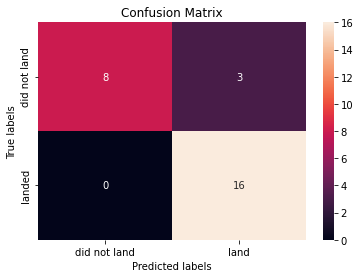

In [79]:
# Confusion matrix for logistic regression model
conf_logreg=logreg_cv.predict(x_test)
plot_confusion_matrix(y_test,conf_logreg)


Examining the confusion matrix, we see that `logistic regression` can distinguish between the different classes. We see that the major problem is `false positives`.


### Support Vector Machine

In [80]:
parameters_svm = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [81]:
svm_cv = GridSearchCV(svm, parameters_svm, cv = 10)
svm_cv.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.9690476190476189


In [83]:
accu.append(svm_cv.score(x_test,y_test))
methods.append('support vector machine')
svm_cv.score(x_test,y_test)

1.0

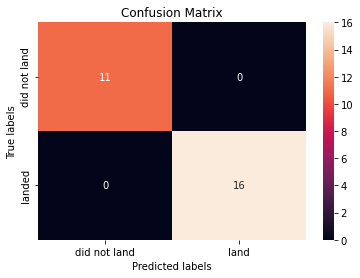

In [84]:
conf_svm=svm_cv.predict(x_test)
plot_confusion_matrix(y_test,conf_svm)

Examining the confusion matrix, we see that `support vector machine` can distinguish between the different classes and We `dont see any major problem` 

### Decision Tree

In [85]:
parameters_dt = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [86]:
tree_cv = GridSearchCV(tree, parameters_dt, cv = 10)
tree_cv.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [87]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.9833333333333334


In [88]:
accu.append(tree_cv.score(x_test,y_test))
methods.append('decision tree classifier')
tree_cv.score(x_test,y_test)

0.8518518518518519

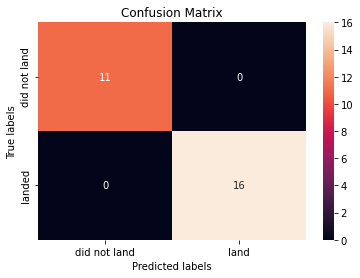

In [89]:
conf_dt = svm_cv.predict(x_test)
plot_confusion_matrix(y_test,conf_dt)

Examining the confusion matrix, we see that `Decision Tree` can distinguish between the different classes and We `dont see any major problem`

### K-Nearest Neighbors

In [90]:
parameters_kn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [91]:
knn_cv = GridSearchCV(KNN, parameters_kn, cv = 10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [92]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.9214285714285715


In [93]:
accu.append(knn_cv.score(x_test,y_test))
methods.append('k nearest neighbors')
knn_cv.score(x_test,y_test)

0.8888888888888888

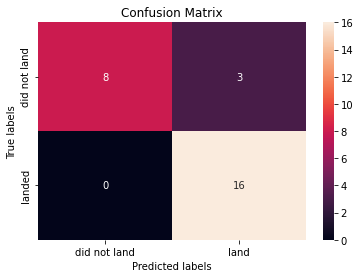

In [94]:
conf_knn = knn_cv.predict(x_test)
plot_confusion_matrix(y_test,conf_knn)

Examining the confusion matrix, we see that `K-Nearest Neighbors` can distinguish between the different classes. We see that the major problem is `false positives`.

### Finding the best model

In [95]:
print(methods)
print(accu)

['logistic regression', 'support vector machine', 'decision tree classifier', 'k nearest neighbors']
[0.8888888888888888, 1.0, 0.8518518518518519, 0.8888888888888888]


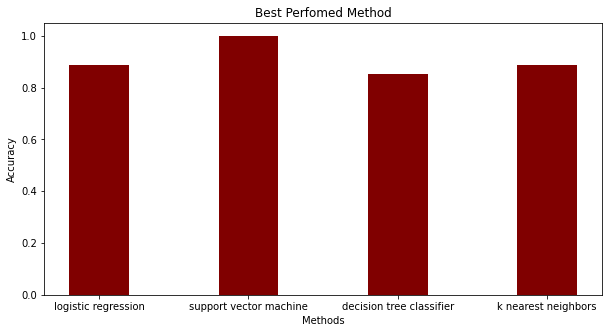

In [96]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(methods, accu, color ='maroon',
        width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()

* `Support Vector Machine accuracy`: 100 % test accuracy
* `Decision Tree Classifer accuracy`: 100 % test accuracy
* Logistic regression accuracy: 88.88 % test accuracy
* K-Nearest Neightbors accuracy: 88.88 % test accuracy

We can use `Suppoer vector machine` model for the best accuracy for predicting if the falcon 9 first stage will land successfully.